In [1]:
import librosa          
import numpy as np      
import matplotlib.pyplot as plt  
import seaborn as sns   
import pandas as pd     
import os              
import glob            
import warnings        
warnings.filterwarnings('ignore')

# Librerías de Machine Learning
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.svm import SVC                        
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

# Librerías de Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential      
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import soundfile as sf  


In [2]:
import os
import glob
from collections import Counter

# Ruta al dataset MESD
MESD_PATH = "C:/Users/erick/Documents/05. IA/voz/data/MESD"

# Emociones reales en los nombres de archivo MESD
emociones_mesd_validas = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness']

# Verificar que la ruta existe
print("Verificando dataset MESD:")
if not os.path.exists(MESD_PATH):
    print(f"ADVERTENCIA: No se encuentra el dataset MESD en {MESD_PATH}")
else:
    print(f"Dataset MESD encontrado en {MESD_PATH}")

print("\n" + "="*60)

# Cargar archivos de MESD
print("Cargando MESD (Mexican Emotional Speech Database)...")
archivos_mesd = []
emociones_mesd = []

if os.path.exists(MESD_PATH):
    archivos_wav = glob.glob(os.path.join(MESD_PATH, "**/*.wav"), recursive=True)
    
    for archivo in archivos_wav:
        nombre_archivo = os.path.basename(archivo).lower()
        
        # Buscar si alguna emoción está presente al inicio del nombre
        emocion_detectada = None
        for emocion in emociones_mesd_validas:
            if nombre_archivo.startswith(emocion):
                emocion_detectada = emocion
                break
        
        if emocion_detectada:
            archivos_mesd.append(archivo)
            emociones_mesd.append(emocion_detectada)
        else:
            print(f"Archivo sin emoción reconocida: {nombre_archivo}")




Verificando dataset MESD:
Dataset MESD encontrado en C:/Users/erick/Documents/05. IA/voz/data/MESD

Cargando MESD (Mexican Emotional Speech Database)...


In [3]:
# Crear un DataFrame
df = pd.DataFrame({
    'archivo': archivos_mesd,
    'emocion': emociones_mesd
})

# Análisis
print("\nANÁLISIS DE DISTRIBUCIÓN DE EMOCIONES")
print("="*50)

conteo_emociones = df['emocion'].value_counts()
print("Archivos por emoción:")
print(conteo_emociones)



ANÁLISIS DE DISTRIBUCIÓN DE EMOCIONES
Archivos por emoción:
emocion
disgust      144
fear         144
sadness      144
happiness    144
anger        143
neutral      143
Name: count, dtype: int64


In [4]:
df

,archivo,emocion
0,C:/Users/erick/Documents/05. IA/voz/data/MESD\...,anger
1,C:/Users/erick/Documents/05. IA/voz/data/MESD\...,anger
2,C:/Users/erick/Documents/05. IA/voz/data/MESD\...,anger
3,C:/Users/erick/Documents/05. IA/voz/data/MESD\...,anger
4,C:/Users/erick/Documents/05. IA/voz/data/MESD\...,anger
...,...,...
857,C:/Users/erick/Documents/05. IA/voz/data/MESD\...,sadness
858,C:/Users/erick/Documents/05. IA/voz/data/MESD\...,sadness
859,C:/Users/erick/Documents/05. IA/voz/data/MESD\...,sadness
860,C:/Users/erick/Documents/05. IA/voz/data/MESD\...,sadness


In [5]:
df['emocion'].unique()

array(['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness'],
      dtype=object)

In [6]:
#Vizualicion de audio de las emociones con espectrogramas y todo lo que se pueda
def plot_spectrogram(audio_path, title):
    audio, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.grid()
    plt.show()


def plot_audio_waveform(audio_path, title):
    audio, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()

In [7]:
emociones_principales = df['emocion'].unique()
df_filtrado = df.copy()


🎵 Visualizando 'ANGER' - Archivo: Anger_C_A_abajo.wav


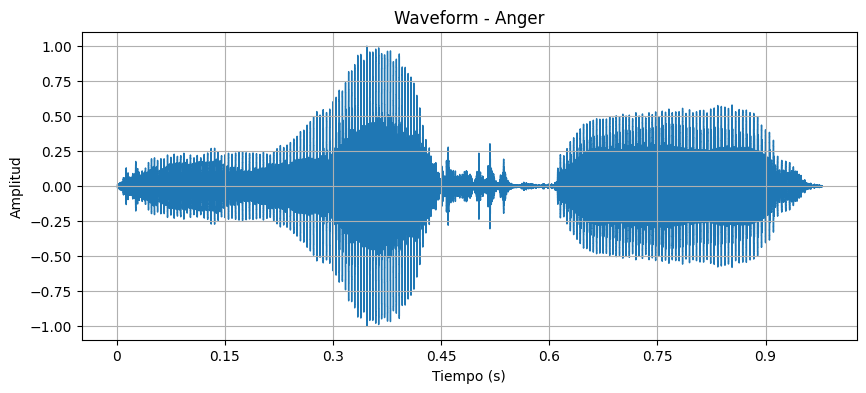

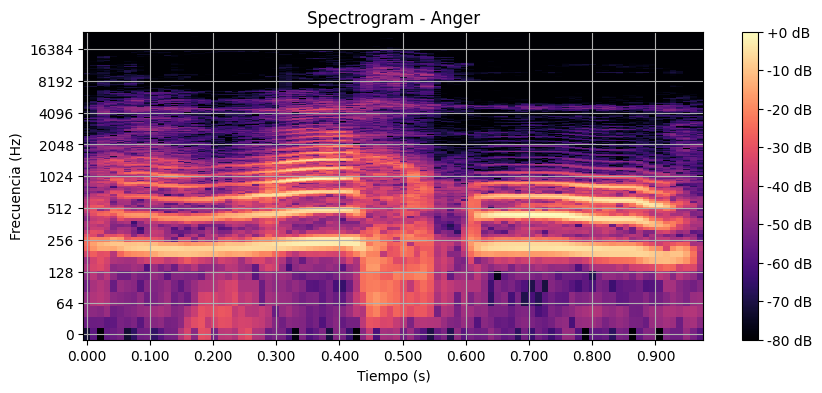


🎵 Visualizando 'DISGUST' - Archivo: Disgust_C_A_abajo.wav


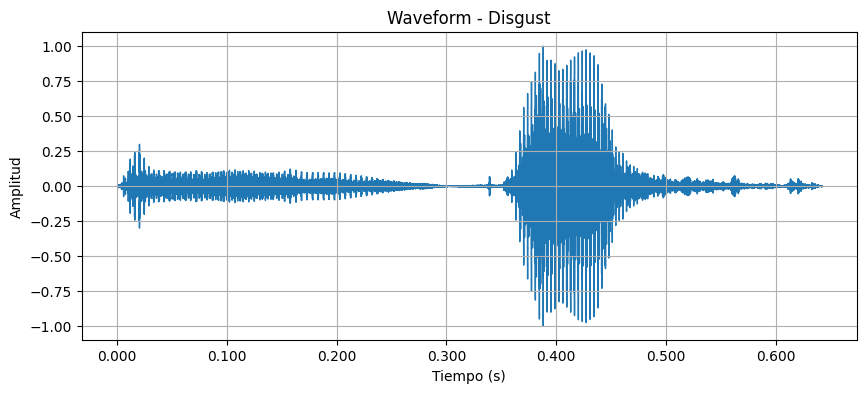

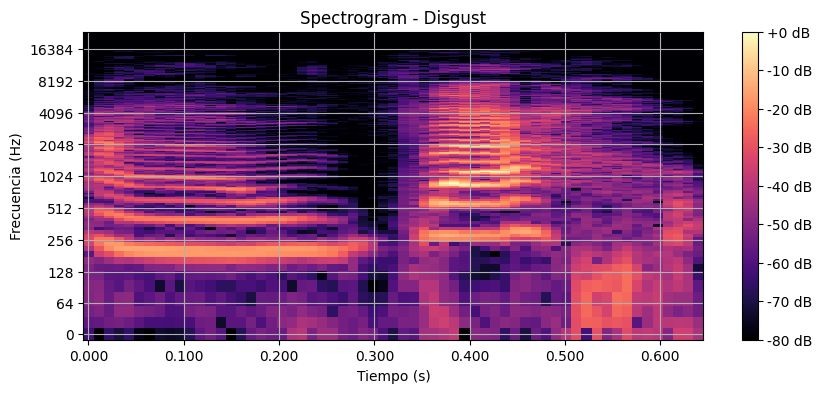


🎵 Visualizando 'FEAR' - Archivo: Fear_C_A_abajo.wav


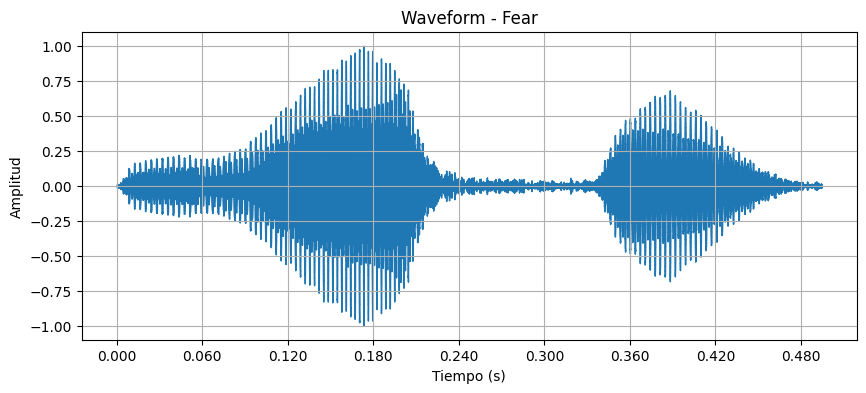

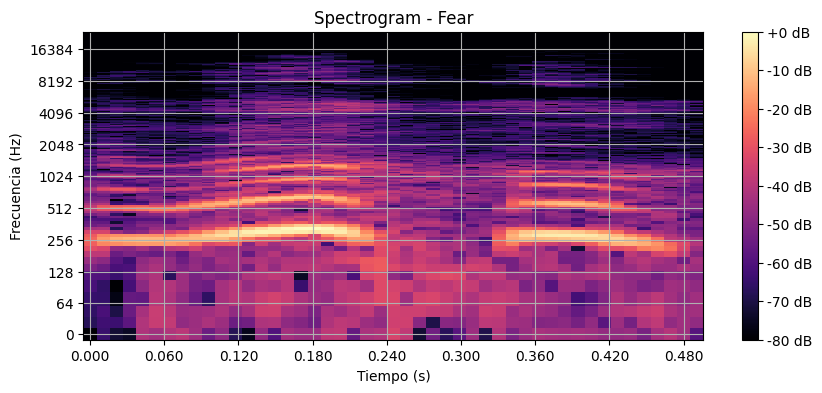


🎵 Visualizando 'HAPPINESS' - Archivo: Happiness_C_A_abajo.wav


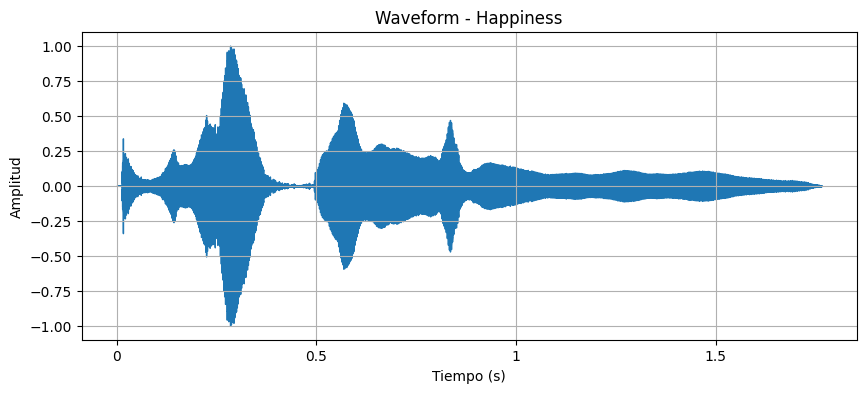

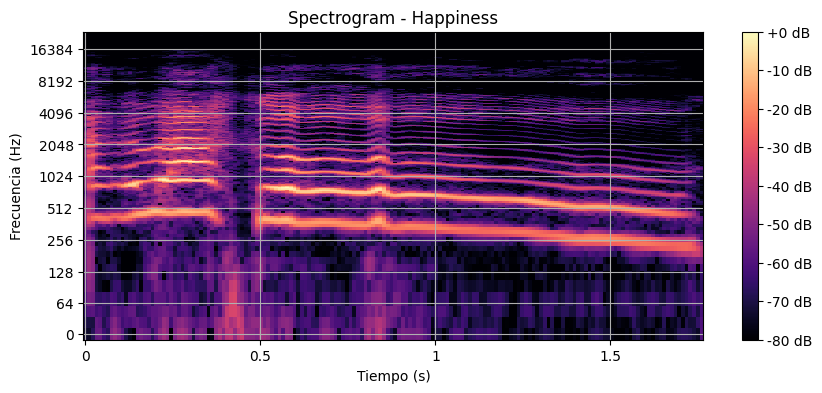


🎵 Visualizando 'NEUTRAL' - Archivo: Neutral_C_A_abajo.wav


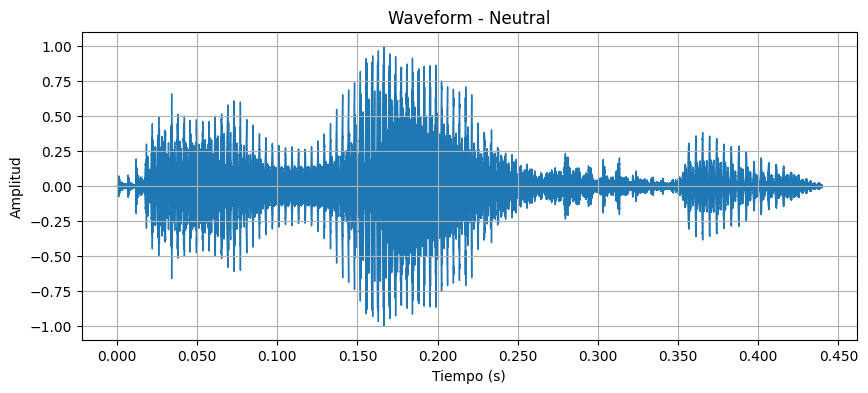

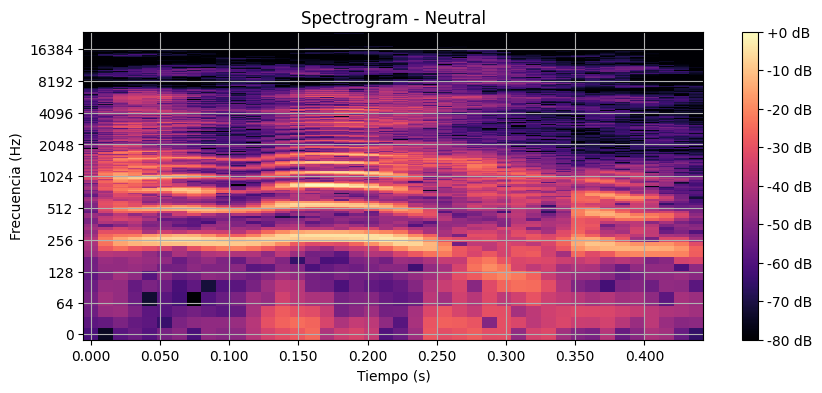


🎵 Visualizando 'SADNESS' - Archivo: Sadness_C_A_abajo.wav


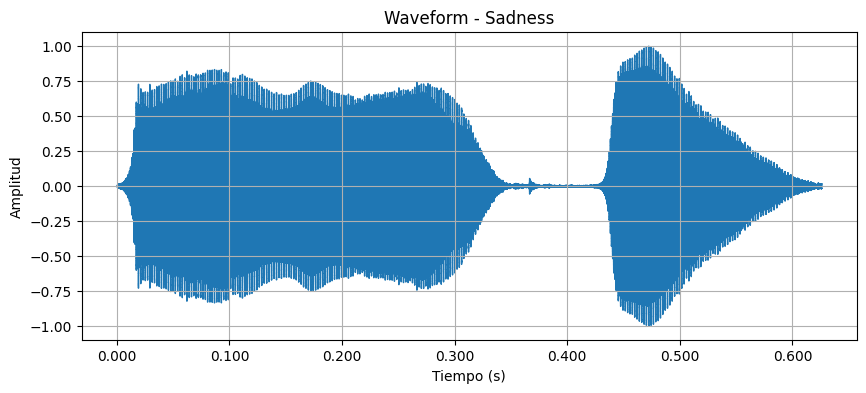

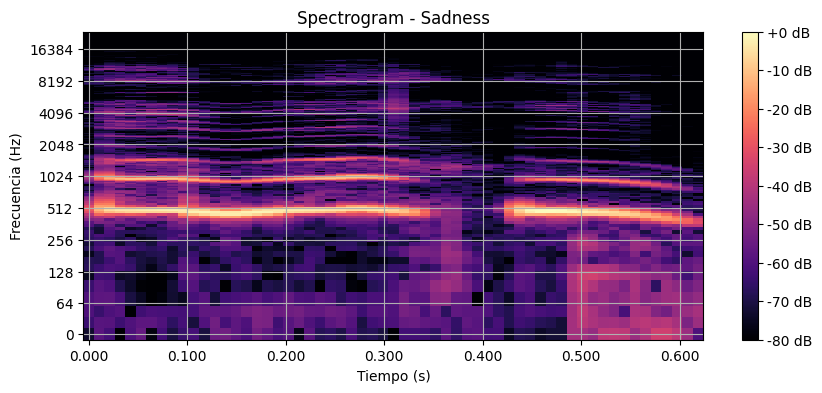

In [8]:
for emocion in emociones_principales:
    archivos_emocion = df_filtrado[df_filtrado['emocion'] == emocion]['archivo'].values
    if len(archivos_emocion) > 0:
        ejemplo_audio = archivos_emocion[0]
        print(f"\n🎵 Visualizando '{emocion.upper()}' - Archivo: {os.path.basename(ejemplo_audio)}")
        plot_audio_waveform(ejemplo_audio, f"Waveform - {emocion.capitalize()}")
        plot_spectrogram(ejemplo_audio, f"Spectrogram - {emocion.capitalize()}")
    else:
        print(f"No hay archivos para la emoción: {emocion}")

In [9]:
# Preparar listas para almacenar características y etiquetas
todas_las_caracteristicas = []
todas_las_etiquetas = []

# Configuración para extracción de características
n_mfcc = 13        # Número de coeficientes MFCC
n_chroma = 12      # Número de características cromáticas
frame_length = 2048
hop_length = 512

print(f"Procesando {len(df_filtrado)} archivos de audio...")
print("Extrayendo características: MFCC, Chroma, Energía, Pitch")

# Contador para mostrar progreso
contador = 0
total_archivos = len(df_filtrado)

for index, row in df_filtrado.iterrows():
    archivo = row['archivo']
    emocion = row['emocion']
    
    try:
        # Cargar archivo de audio
        audio, sr = librosa.load(archivo, sr=22050)  # Normalizar a 22kHz
        
        # 1. MFCC (Mel-Frequency Cepstral Coefficients)
        # Captura las características espectrales del habla
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, 
                                   n_fft=frame_length, hop_length=hop_length)
        mfcc_mean = np.mean(mfcc, axis=1)  # Promedio de cada coeficiente
        mfcc_std = np.std(mfcc, axis=1)    # Desviación estándar
        
        # 2. CHROMA (Características cromáticas)
        # Captura el contenido armónico y tonal
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr, 
                                           n_fft=frame_length, hop_length=hop_length)
        chroma_mean = np.mean(chroma, axis=1)
        chroma_std = np.std(chroma, axis=1)
        
        # 3. ESPECTROGRAMA MEL
        # Representa la energía en diferentes bandas de frecuencia
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr,
                                                 n_fft=frame_length, hop_length=hop_length)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        mel_mean = np.mean(mel_spec_db, axis=1)
        mel_std = np.std(mel_spec_db, axis=1)
        
        # 4. CARACTERÍSTICAS TEMPORALES
        # Zero Crossing Rate (tasa de cruces por cero)
        zcr = librosa.feature.zero_crossing_rate(audio, frame_length=frame_length, 
                                               hop_length=hop_length)
        zcr_mean = np.mean(zcr)
        zcr_std = np.std(zcr)
        
        # 5. CARACTERÍSTICAS DE ENERGÍA
        # RMS (Root Mean Square) - energía del audio
        rms = librosa.feature.rms(y=audio, frame_length=frame_length, 
                                 hop_length=hop_length)
        rms_mean = np.mean(rms)
        rms_std = np.std(rms)
        
        # 6. CARACTERÍSTICAS DE PITCH (FUNDAMENTAL FREQUENCY)
        # Frecuencia fundamental - qué tan aguda o grave es la voz
        pitches, magnitudes = librosa.piptrack(y=audio, sr=sr, 
                                             fmin=75, fmax=600)  # Rango típico de voz humana
        
        # Extraer pitch dominante
        pitch_values = []
        for t in range(pitches.shape[1]):
            index = magnitudes[:, t].argmax()
            pitch = pitches[index, t]
            if pitch > 0:
                pitch_values.append(pitch)
        
        if len(pitch_values) > 0:
            pitch_mean = np.mean(pitch_values)
            pitch_std = np.std(pitch_values)
            pitch_min = np.min(pitch_values)
            pitch_max = np.max(pitch_values)
        else:
            pitch_mean = pitch_std = pitch_min = pitch_max = 0
        
        # 7. CARACTERÍSTICAS ESPECTRALES ADICIONALES
        # Centroide espectral - "brillo" del sonido
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        sc_mean = np.mean(spectral_centroid)
        sc_std = np.std(spectral_centroid)
        
        # Rolloff espectral - frecuencia por debajo de la cual está el 85% de la energía
        spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
        sr_mean = np.mean(spectral_rolloff)
        sr_std = np.std(spectral_rolloff)
        
        # 8. COMBINAR TODAS LAS CARACTERÍSTICAS
        caracteristicas_archivo = np.concatenate([
            mfcc_mean, mfcc_std,           # MFCC: 13 + 13 = 26 características
            chroma_mean, chroma_std,       # Chroma: 12 + 12 = 24 características
            mel_mean, mel_std,             # Mel: 128 + 128 = 256 características
            [zcr_mean, zcr_std],           # ZCR: 2 características
            [rms_mean, rms_std],           # RMS: 2 características
            [pitch_mean, pitch_std, pitch_min, pitch_max],  # Pitch: 4 características
            [sc_mean, sc_std],             # Spectral Centroid: 2 características
            [sr_mean, sr_std]              # Spectral Rolloff: 2 características
        ])
        
        # Almacenar características y etiqueta
        todas_las_caracteristicas.append(caracteristicas_archivo)
        todas_las_etiquetas.append(emocion)
        
        contador += 1
        if contador % 500 == 0:
            progreso = (contador / total_archivos) * 100
            print(f"Progreso: {contador}/{total_archivos} ({progreso:.1f}%)")
            
    except Exception as e:
        print(f"Error procesando {archivo}: {e}")
        continue

print(f"\nExtracción completada: {len(todas_las_caracteristicas)} archivos procesados")

# Convertir a arrays de NumPy
X = np.array(todas_las_caracteristicas)
y = np.array(todas_las_etiquetas)

print(f"\nDimensiones finales:")
print(f"Características (X): {X.shape}")
print(f"Etiquetas (y): {y.shape}")
print(f"Total de características por archivo: {X.shape[1]}")

# Verificar que no hay valores NaN o infinitos
print(f"\nVerificación de datos:")
print(f"Valores NaN en X: {np.isnan(X).sum()}")
print(f"Valores infinitos en X: {np.isinf(X).sum()}")

# Reemplazar valores problemáticos si existen
if np.isnan(X).sum() > 0 or np.isinf(X).sum() > 0:
    print("Limpiando valores problemáticos...")
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)
    print("Limpieza completada")

# Mostrar estadísticas básicas de las características
print(f"\nEstadísticas de las características:")
print(f"Valor mínimo: {X.min():.6f}")
print(f"Valor máximo: {X.max():.6f}")
print(f"Promedio: {X.mean():.6f}")
print(f"Desviación estándar: {X.std():.6f}")

# Mostrar distribución de etiquetas procesadas
print(f"\nDistribución final de emociones:")
etiquetas_unicas, conteos = np.unique(y, return_counts=True)
for etiqueta, conteo in zip(etiquetas_unicas, conteos):
    print(f"  {etiqueta}: {conteo} archivos")


Procesando 862 archivos de audio...
Extrayendo características: MFCC, Chroma, Energía, Pitch
Progreso: 500/862 (58.0%)

Extracción completada: 862 archivos procesados

Dimensiones finales:
Características (X): (862, 318)
Etiquetas (y): (862,)
Total de características por archivo: 318

Verificación de datos:
Valores NaN en X: 0
Valores infinitos en X: 0

Estadísticas de las características:
Valor mínimo: -375.097900
Valor máximo: 7559.639345
Promedio: 16.208220
Desviación estándar: 293.169521

Distribución final de emociones:
  anger: 143 archivos
  disgust: 144 archivos
  fear: 144 archivos
  happiness: 144 archivos
  neutral: 143 archivos
  sadness: 144 archivos


In [10]:
X

array([[-257.67230225,  168.11672974,    6.2567606 , ...,  588.57953042,
        2032.63422057, 1947.83066727],
       [-199.21998596,   94.70280457,   28.89680099, ..., 1511.88050105,
        3307.30424361, 2215.22577128],
       [-240.25003052,   57.91317368,   16.10055351, ..., 2222.80106976,
        4261.84387207, 2819.88137132],
       ...,
       [-283.85308838,  114.8000946 ,   11.97256851, ...,  571.87913759,
        1734.09576416, 1453.5508684 ],
       [-271.38119507,   67.04164886,   18.87832451, ...,  619.73725607,
        3429.01710304, 1855.07152732],
       [-214.56558228,   33.46595383,   32.81811523, ..., 2490.15979875,
        5596.34898793, 3236.71807317]])

In [11]:


# NORMALIZACIÓN DE CARACTERÍSTICAS
# Las características tienen escalas muy diferentes (MFCC vs energía vs pitch)
# StandardScaler convierte todo a media=0 y desviación=1
print("Aplicando normalización StandardScaler...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Estadísticas ANTES de normalizar:")
print(f"  Promedio: {X.mean():.6f}")
print(f"  Desviación estándar: {X.std():.6f}")
print(f"  Rango: [{X.min():.2f}, {X.max():.2f}]")

print("\nEstadísticas DESPUÉS de normalizar:")
print(f"  Promedio: {X_scaled.mean():.6f}")
print(f"  Desviación estándar: {X_scaled.std():.6f}")
print(f"  Rango: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")


Aplicando normalización StandardScaler...
Estadísticas ANTES de normalizar:
  Promedio: 16.208220
  Desviación estándar: 293.169521
  Rango: [-375.10, 7559.64]

Estadísticas DESPUÉS de normalizar:
  Promedio: -0.000000
  Desviación estándar: 1.000000
  Rango: [-4.33, 6.65]


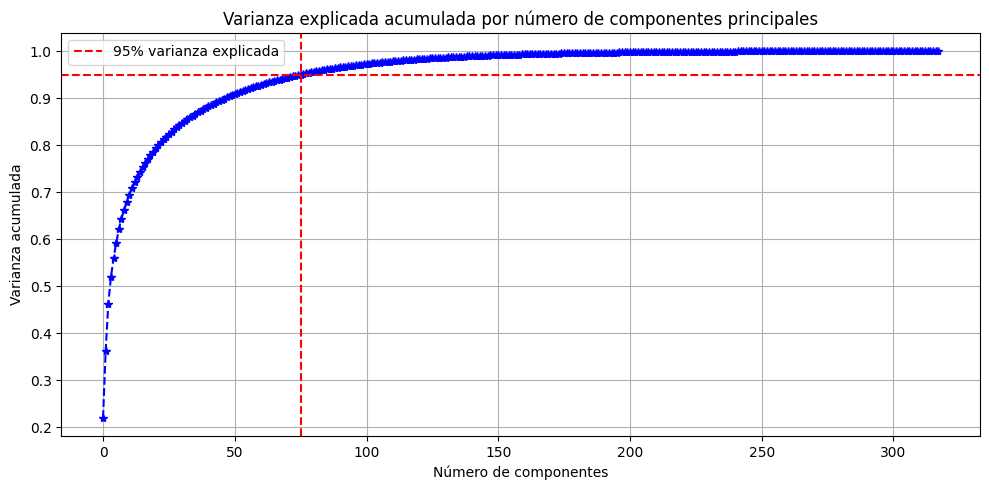

In [12]:

from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA().fit(X_scaled) 
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Graficar varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(explained_var, marker='*', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza explicada')
plt.axvline(x=np.argmax(explained_var >= 0.95), color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
from sklearn.decomposition import PCA

# Aplicar PCA con 95% de varianza retenida
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)


In [14]:
X_pca.shape

(862, 76)

In [15]:
# CODIFICACIÓN DE ETIQUETAS
# Convertir texto a números para los algoritmos
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\nCodificación de emociones:")
for i, emocion in enumerate(le.classes_):
    print(f"  {emocion} -> {i}")


Codificación de emociones:
  anger -> 0
  disgust -> 1
  fear -> 2
  happiness -> 3
  neutral -> 4
  sadness -> 5


In [16]:
# DIVISION DE DATOS
# 70% entrenamiento, 15% validación, 15% prueba
print(f"\nDividiendo datos...")

# Primero: 70% entrenamiento, 30% temporal
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca, y_encoded, 
    test_size=0.3, 
    random_state=100, 
    stratify=y_encoded  # Mantener proporciones de cada emoción
)

# Segundo: dividir el 30% en validación (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=100, 
    stratify=y_temp
)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de validación: {X_val.shape[0]} muestras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Verificar que las proporciones se mantienen
# print(f"\nVerificación de balance en cada conjunto:")
# for y_conjunto, nombre in [(y_train, "entrenamiento"), (y_val, "validación"), (y_test, "prueba")]:
#     print(f"\n{nombre.upper()}:")
#     etiquetas_unicas, conteos = np.unique(y_conjunto, return_counts=True)
#     for etiqueta, conteo in zip(etiquetas_unicas, conteos):
#         emocion = le.inverse_transform([etiqueta])[0]
#         porcentaje = conteo / len(y_conjunto) * 100
#         print(f"  {emocion}: {conteo} ({porcentaje:.1f}%)")


Dividiendo datos...
Conjunto de entrenamiento: 603 muestras (70.0%)
Conjunto de validación: 129 muestras (15.0%)
Conjunto de prueba: 130 muestras (15.1%)


In [17]:

svm_model = SVC(
    kernel='rbf',      # Kernel no lineal para capturar relaciones complejas
    C=1.0,            # Regularización (balance entre margen y errores)
    gamma='scale',     # Parámetro del kernel RBF
    random_state=100
)


In [18]:
svm_model.fit(X_train, y_train)

SVC(random_state=100)

In [19]:
# Hacer predicciones

y_pred_svm = svm_model.predict(X_test)


Evaluación del modelo SVC:
              precision    recall  f1-score   support

       anger       0.89      0.73      0.80        22
     disgust       0.80      0.73      0.76        22
        fear       0.90      0.90      0.90        21
   happiness       0.82      0.86      0.84        21
     neutral       0.89      0.77      0.83        22
     sadness       0.67      0.91      0.77        22

    accuracy                           0.82       130
   macro avg       0.83      0.82      0.82       130
weighted avg       0.83      0.82      0.82       130



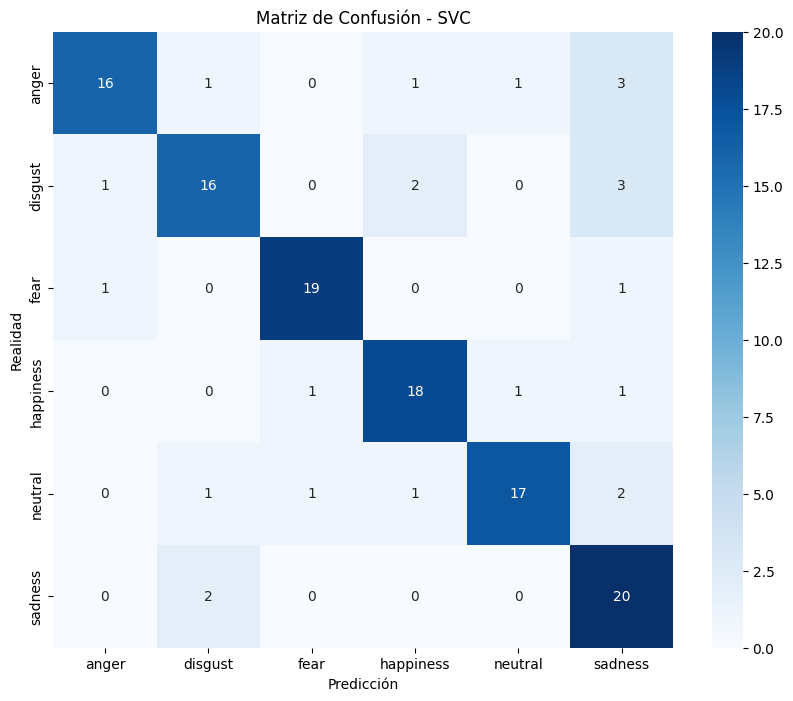


Precisión del modelo SVC: 0.82 (81.5%)


In [20]:
# Evaluar modelo
print("\nEvaluación del modelo SVC:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión - SVC")
plt.xlabel("Predicción")    
plt.ylabel("Realidad")
plt.show()
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nPrecisión del modelo SVC: {accuracy:.2f} ({accuracy * 100:.1f}%)")


In [21]:
# Reshape para CNN 1D: (muestras, características, 1)

# Las CNNs esperan datos en formato (muestras, características, canales)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
num_classes = len(le.classes_)
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

In [23]:
model_cnn = Sequential([
    # Primera capa convolucional
    Conv1D(filters=64, kernel_size=5, activation='relu', 
           input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Segunda capa convolucional
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Tercera capa convolucional
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Aplanar para capas densas
    Flatten(),
    
    # Capas densas (completamente conectadas)
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    
    # Capa de salida
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
# Parar si no mejora la validacion
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Reducir learning rate si se estanca
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

# Entrenar el modelo

history = model_cnn.fit(
    X_train_cnn, y_train_onehot,
    batch_size=32,
    epochs=100,  # Máximo 50 épocas
    validation_data=(X_val_cnn, y_val_onehot),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.1835 - loss: 1.8378 - val_accuracy: 0.2171 - val_loss: 1.7914 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1756 - loss: 1.8124 - val_accuracy: 0.1938 - val_loss: 1.7895 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1836 - loss: 1.7836 - val_accuracy: 0.2093 - val_loss: 1.7885 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1665 - loss: 1.8007 - val_accuracy: 0.2248 - val_loss: 1.7884 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1466 - loss: 1.8030 - val_accuracy: 0.1938 - val_loss: 1.7879 - learning_rate: 0.0010
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1699 - loss: 1.7912 - val_accuracy: 0.2481 - val_loss: 1.7854 - learning_rate: 0.0010
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1773 - loss: 1.8088 - 

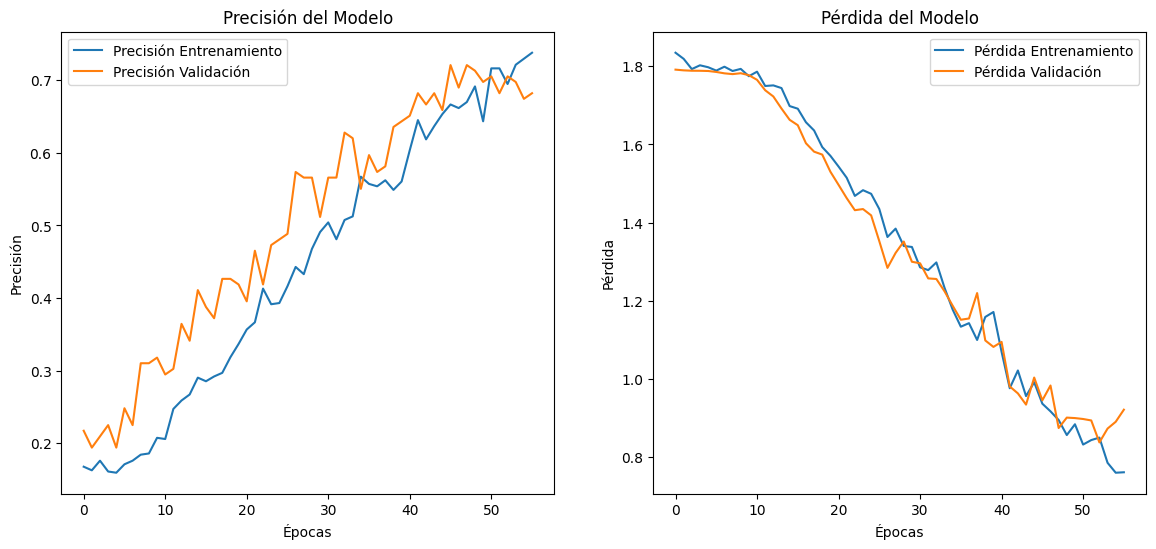

In [25]:
# Gráfico de precisión y loss 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()




5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Evaluación del modelo CNN:
              precision    recall  f1-score   support

       anger       0.74      0.64      0.68        22
     disgust       0.65      0.50      0.56        22
        fear       0.54      0.67      0.60        21
   happiness       0.65      0.81      0.72        21
     neutral       0.54      0.59      0.57        22
     sadness       0.72      0.59      0.65        22

    accuracy                           0.63       130
   macro avg       0.64      0.63      0.63       130
weighted avg       0.64      0.63      0.63       130



Text(0.5, 1.0, 'Matriz de Confusión - CNN')

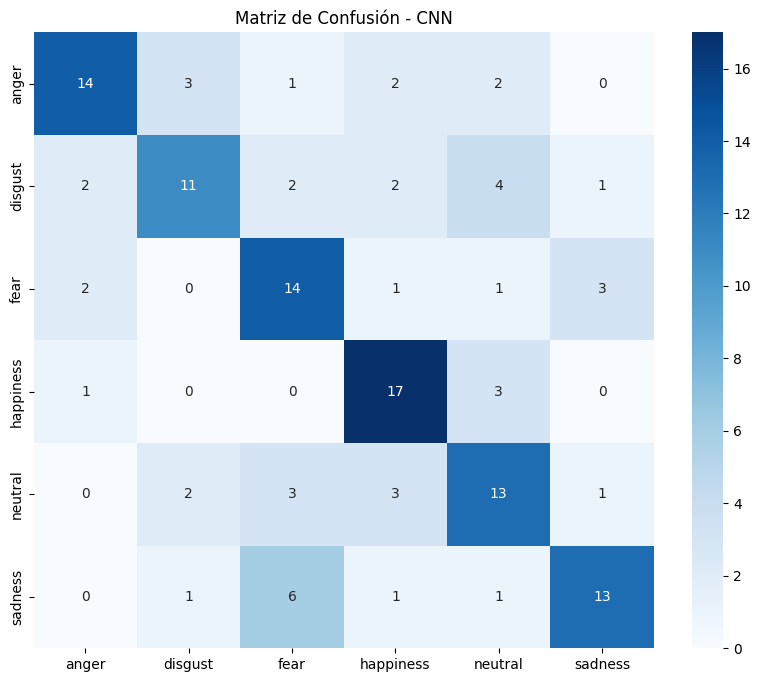

In [26]:
# Matriz de confusión para CNN
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred_cnn, axis=1)
# Evaluar modelo CNN
print("\nEvaluación del modelo CNN:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))
# Matriz de confusión
cm_cnn = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión - CNN")


In [27]:
# Paso 1: Define la ruta del nuevo archivo de voz
archivo = "3.wav"  

# Paso 2: Copia aquí tu bloque de extracción tal como está, sin el for/try externo

# Cargar archivo de audio
audio, sr = librosa.load(archivo, sr=22050)

# MFCC
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, 
                            n_fft=frame_length, hop_length=hop_length)
mfcc_mean = np.mean(mfcc, axis=1)
mfcc_std = np.std(mfcc, axis=1)

# CHROMA
chroma = librosa.feature.chroma_stft(y=audio, sr=sr, 
                                     n_fft=frame_length, hop_length=hop_length)
chroma_mean = np.mean(chroma, axis=1)
chroma_std = np.std(chroma, axis=1)

# MEL
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr,
                                          n_fft=frame_length, hop_length=hop_length)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
mel_mean = np.mean(mel_spec_db, axis=1)
mel_std = np.std(mel_spec_db, axis=1)

# ZCR
zcr = librosa.feature.zero_crossing_rate(audio, frame_length=frame_length, 
                                         hop_length=hop_length)
zcr_mean = np.mean(zcr)
zcr_std = np.std(zcr)

# RMS
rms = librosa.feature.rms(y=audio, frame_length=frame_length, 
                          hop_length=hop_length)
rms_mean = np.mean(rms)
rms_std = np.std(rms)

# PITCH
pitches, magnitudes = librosa.piptrack(y=audio, sr=sr, fmin=75, fmax=600)
pitch_values = []
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()
    pitch = pitches[index, t]
    if pitch > 0:
        pitch_values.append(pitch)

if len(pitch_values) > 0:
    pitch_mean = np.mean(pitch_values)
    pitch_std = np.std(pitch_values)
    pitch_min = np.min(pitch_values)
    pitch_max = np.max(pitch_values)
else:
    pitch_mean = pitch_std = pitch_min = pitch_max = 0

# CENTROIDES Y ROLLOFF
spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
sc_mean = np.mean(spectral_centroid)
sc_std = np.std(spectral_centroid)

spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
sr_mean = np.mean(spectral_rolloff)
sr_std = np.std(spectral_rolloff)

# COMBINAR TODAS LAS CARACTERÍSTICAS
caracteristicas_archivo = np.concatenate([
    mfcc_mean, mfcc_std,
    chroma_mean, chroma_std,
    mel_mean, mel_std,
    [zcr_mean, zcr_std],
    [rms_mean, rms_std],
    [pitch_mean, pitch_std, pitch_min, pitch_max],
    [sc_mean, sc_std],
    [sr_mean, sr_std]
]).reshape(1, -1)

# Paso 3: Normalizar y aplicar PCA
caracteristicas_scaled = scaler.transform(caracteristicas_archivo)
caracteristicas_pca = pca.transform(caracteristicas_scaled)

# Paso 4: Predecir con tu modelo
pred_svm = svm_model.predict(caracteristicas_pca)
print(" Emoción detectada (SVM):", le.inverse_transform(pred_svm)[0])

# Si quieres probar la CNN también:
caract_cnn = caracteristicas_pca.reshape(1, caracteristicas_pca.shape[1], 1)
pred_cnn = model_cnn.predict(caract_cnn)
print(" Emoción detectada (CNN):", le.inverse_transform([np.argmax(pred_cnn)])[0])


 Emoción detectada (SVM): happiness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
 Emoción detectada (CNN): happiness


In [29]:
# GUARDAR MODELOS PARA EL BOT DE TELEGRAM
import joblib
import os

# Crear directorio para modelos
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"📁 Directorio '{models_dir}' creado")

try:
    # Guardar scaler
    scaler_path = os.path.join(models_dir, 'scaler.pkl')
    joblib.dump(scaler, scaler_path)
    print(f"✅ Scaler guardado: {scaler_path}")
    
    # Guardar PCA
    pca_path = os.path.join(models_dir, 'pca.pkl')
    joblib.dump(pca, pca_path)
    print(f"✅ PCA guardado: {pca_path}")
    
    # Guardar SVM
    svm_path = os.path.join(models_dir, 'svm_model.pkl')
    joblib.dump(svm_model, svm_path)
    print(f"✅ SVM guardado: {svm_path}")
    
    # Guardar Label Encoder
    le_path = os.path.join(models_dir, 'label_encoder.pkl')
    joblib.dump(le, le_path)
    print(f"✅ Label Encoder guardado: {le_path}")
    
    # El modelo CNN ya está guardado como 'modelo_cnn.h5'
    # Copiarlo al directorio de modelos
    import shutil
    if os.path.exists('modelo_cnn.h5'):
        cnn_dest = os.path.join(models_dir, 'modelo_cnn.h5')
        shutil.copy2('modelo_cnn.h5', cnn_dest)
        print(f"✅ CNN copiado: {cnn_dest}")
    
    print(f"\n🎉 Todos los modelos guardados en: {models_dir}")
    print("\n📋 Archivos listos para el bot:")
    for file in ['scaler.pkl', 'pca.pkl', 'svm_model.pkl', 'label_encoder.pkl', 'modelo_cnn.h5']:
        file_path = os.path.join(models_dir, file)
        if os.path.exists(file_path):
            size = os.path.getsize(file_path) / 1024 / 1024  # MB
            print(f"  ✓ {file} ({size:.1f} MB)")
        else:
            print(f"  ✗ {file} (faltante)")
            
except Exception as e:
    print(f"❌ Error guardando modelos: {e}")

📁 Directorio 'models' creado
✅ Scaler guardado: models\scaler.pkl
✅ PCA guardado: models\pca.pkl
✅ SVM guardado: models\svm_model.pkl
✅ Label Encoder guardado: models\label_encoder.pkl

🎉 Todos los modelos guardados en: models

📋 Archivos listos para el bot:
  ✓ scaler.pkl (0.0 MB)
  ✓ pca.pkl (0.2 MB)
  ✓ svm_model.pkl (0.4 MB)
  ✓ label_encoder.pkl (0.0 MB)
  ✗ modelo_cnn.h5 (faltante)


In [30]:
# Guardar el modelo CNN primero
print("Guardando modelo CNN...")
model_cnn.save('modelo_cnn.h5')
print("✅ Modelo CNN guardado como modelo_cnn.h5")

# Copiarlo a la carpeta models
import shutil
if os.path.exists('modelo_cnn.h5'):
    cnn_dest = os.path.join('models', 'modelo_cnn.h5')
    shutil.copy2('modelo_cnn.h5', cnn_dest)
    size = os.path.getsize(cnn_dest) / 1024 / 1024  # MB
    print(f"✅ CNN copiado a: {cnn_dest} ({size:.1f} MB)")
else:
    print("❌ Error: No se pudo guardar modelo_cnn.h5")

Guardando modelo CNN...
✅ Modelo CNN guardado como modelo_cnn.h5
✅ CNN copiado a: models\modelo_cnn.h5 (1.4 MB)
